In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('archive/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 1. How many records are in the dataset?

In [5]:
len(data)

8807

Ans: 8807 records are present in the dataset

# 2. How many unique types (movies/TV-shows) are present in the dataset?

In [6]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Ans: There are two types in the dataset i.e; Movies and TV shows. There are 6131 different movies and 2676 different TV Shows.

# 3. What is the distribution of ratings (G, PG, PG-13, etc.) in the dataset?

<AxesSubplot:xlabel='rating', ylabel='count'>

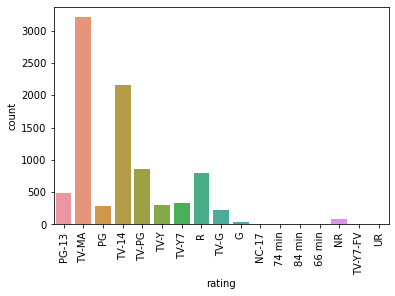

In [7]:
plt.xticks(rotation=90)
sns.countplot(x='rating',data=data)

In [8]:
# 74 min,84 min and 66min dont seem like Rating
data[data['rating'].isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [9]:
#updating the duration and rating of above 3 rows accordingly
temp = [5541,5794,5813]
for tempval in temp:
    data.at[tempval,'duration']=data.loc[tempval,'rating']
    data.at[tempval,'rating']=None
data.loc[temp,:]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,None,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,None,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,None,66 min,Movies,The comic puts his trademark hilarious/thought...


<AxesSubplot:xlabel='rating', ylabel='count'>

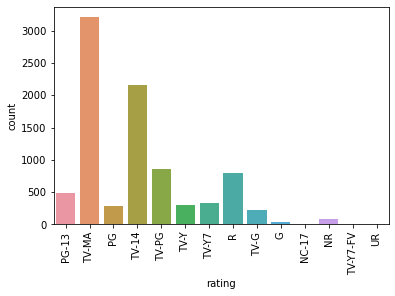

In [10]:
#3. What is the distribution of ratings (G, PG, PG-13, etc.) in the dataset?
plt.xticks(rotation=90)
sns.countplot(x='rating',data=data)

# 4. What is the average duration of movies and TV-shows?

In [11]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [12]:
print(data[data['type']=='TV Show']['duration'].unique())
print(data[data['type']=='Movie']['duration'].unique())

['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']
['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '64 min' '59 min' '139 min' '69 min' '148 min' '189 min'
 '141 min' '130 min' '138 min' '81 min' '132 min' '

In [13]:
#All the values in duration are in same format. For Tv show its 'number Season/Seasons' and for Movie its 'number min'
#Extracting number from all values
data['duration_num'] = data['duration'].apply(lambda x: int(x.split()[0]))

In [14]:
print(data[data['type']=='TV Show']['duration_num'].mean())
print(data[data['type']=='Movie']['duration_num'].mean())

1.764947683109118
99.56499755341706


Ans: Averge duration for Tv Shows is 2 seasons and for movies is 100 min approximately.

# 5. Which director has the most content on Netflix?

In [15]:
data['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

Ans: As seen earlier 2634 are null in director column but based on the available data Rajiv Chikala has more entries in the data  set.

# 6. Which country produces the most content on Netflix?

In [16]:
data['country'].value_counts().sort_values(ascending=False)[:5]

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

Ans: USA has the most content on Netfix than other countries.

# 7. How has the number of content additions evolved over the years?

In [19]:
#Replacing Nan values to apply functions to extract year
data['date_added'].replace(np.nan, 'No Date',inplace=True)

In [52]:
import re
data['year_added']=data['date_added'].apply(lambda x: int(re.search(r'[1-2][0-9]{3}',x).group()) if re.search(r'[1-2][0-9]{3}',x) else None)

<AxesSubplot:xlabel='year_added', ylabel='count'>

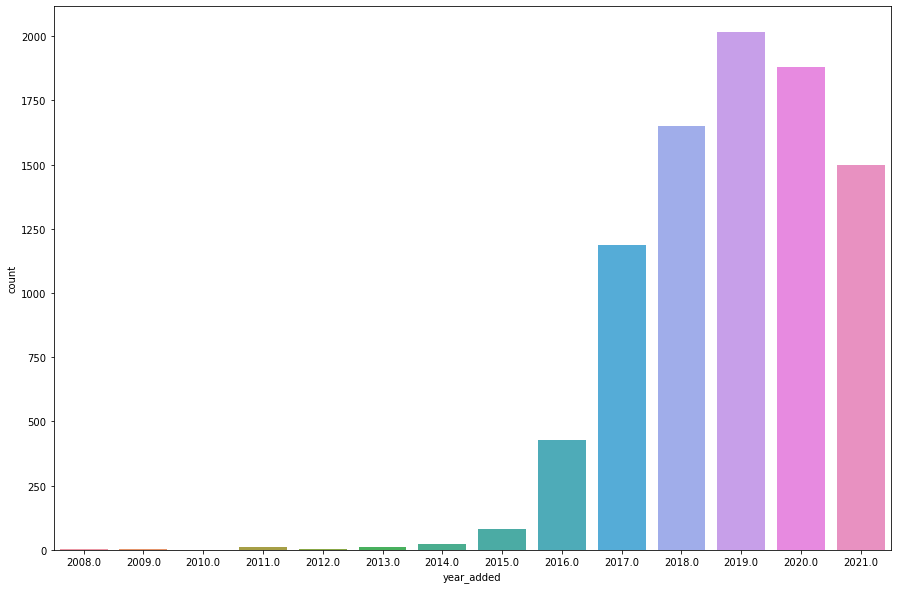

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x='year_added',data=data)

Ans: There has been a sudden increase after 2015 and 2016 in number additions till 2019 and then decreased slightly in 2020 and 2021

# 8. What are the top 5 countries with the highest average ratings?

Ans: Rating in the given data represents the movie certificate rating not the rating given by users. So we cannot get the highest average ratings

# 9. What are the most common genres listed in the "listed_in" column?

In [116]:
data['genres']=data['listed_in'].apply(lambda x : set([_.strip() for _ in x.split(',')]))

In [118]:
genres_list = data['genres'].to_list()
genres_dict = {}
genres_set = set()
for genres in genres_list:
    for genre in genres:
        if(genre in genres_set):
            genres_dict[genre]+=1
        else:
            genres_dict[genre]=1
            genres_set.add(genre)
sorted(((v,k) for k,v in genres_dict.items()), reverse=True)[:5]

[(2752, 'International Movies'),
 (2427, 'Dramas'),
 (1674, 'Comedies'),
 (1351, 'International TV Shows'),
 (869, 'Documentaries')]

Ans: Most common generes listed in the listed_in column are International Movies, Dramas,Comedies,International TV Shows and Documentaries

# 10. What are the oldest and newest releases in the dataset?

In [25]:
print('Oldest release in the dataset is in the year ',min(data['release_year']))
print('Newest release in the dataset is in the year ',max(data['release_year']))

Oldest release in the dataset is in the year  1925
Newest release in the dataset is in the year  2021


In [134]:
data[data['release_year'].isin([1925,2021])]['title'].to_list()

['Blood & Water',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory',
 'Midnight Mass',
 'My Little Pony: A New Generation',
 'The Great British Baking Show',
 'The Starling',
 'Vendetta: Truth, Lies and The Mafia',
 'Bangkok Breaking',
 'Je Suis Karl',
 'Confessions of an Invisible Girl',
 'Crime Stories: India Detectives',
 'Dear White People',
 'Intrusion',
 'Jaguar',
 'Monsters Inside: The 24 Faces of Billy Milligan',
 'Go! Go! Cory Carson: Chrissy Takes the Wheel',
 'Love on the Spectrum',
 'Ankahi Kahaniya',
 'Chicago Party Aunt',
 'Squid Game',
 'The Father Who Moves Mountains',
 'The Stronghold',
 'Chhota Bheem',
 'He-Man and the Masters of the Universe',
 'My Heroes Were Cowboys',
 'Castle and Castle',
 'Nailed It',
 'Nightbooks',
 'Numberblocks',
 'Schumacher',
 'Too Hot To Handle: Latino',
 'A StoryBots Space Adventure',
 'Jack Whitehall: Travels with My Father',
 "The World's Most Amazing Vacation Rentals",
 'You vs. Wild: Out Cold',
 'Little Singham - Black Shadow',
 

Ans: Above are the oldest and newest releases from the dataset

# 11. Who are the top 5 most frequent actors/actresses in the "cast" column?

In [112]:
data['cast'].replace(np.nan,'',inplace=True)

In [115]:
data['cast_']=data['cast'].apply(lambda x : set([_.strip() for _ in x.split(',')]))
cast_list = data['cast_'].to_list()
cast_dict = {}
cast_set = set()
for cast in cast_list:
    for actor in cast:
        if(actor in cast_set):
            cast_dict[actor]+=1
        else:
            cast_dict[actor]=1
            cast_set.add(actor)
sorted(((v,k) for k,v in cast_dict.items()), reverse=True)[:6]

[(825, ''),
 (43, 'Anupam Kher'),
 (35, 'Shah Rukh Khan'),
 (33, 'Julie Tejwani'),
 (32, 'Takahiro Sakurai'),
 (32, 'Naseeruddin Shah')]

Top 5 Actors/Actresses are Anupam Kher, Shah Rukh Khan, Julie Tejwani, Takahiro Sakurai and Naseeruddin Shah

# 12. How many TV-shows and movies were added to Netflix each year?

<AxesSubplot:xlabel='year'>

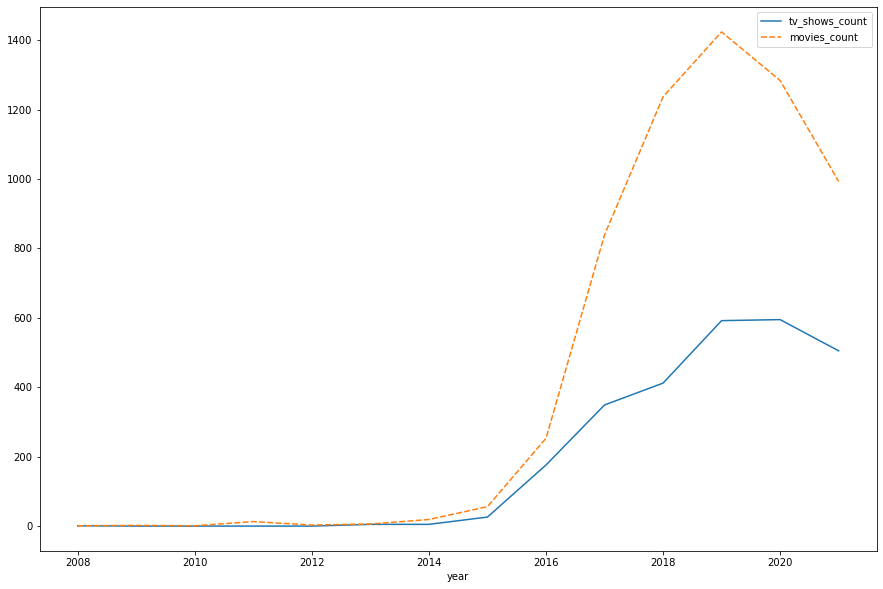

In [66]:
movies = data[data['type']=='Movie'].groupby('year_added').count()['type']
tv_shows = data[data['type']=='TV Show'].groupby('year_added').count()['type']
dict_={'year':[],'tv_shows_count':[],'movies_count':[]}
for year in range(2008,2022):
    dict_['year'].append(year)
    if year in movies.index:
        dict_['movies_count'].append(movies[year])
    else: dict_['movies_count'].append(0)
    if year in tv_shows.index:
        dict_['tv_shows_count'].append(tv_shows[year])
    else: dict_['tv_shows_count'].append(0)
df = pd.DataFrame.from_dict(dict_)
df = df.set_index('year')
plt.figure(figsize=(15,10))
sns.lineplot(data=df[['tv_shows_count','movies_count']])

Ans: Above are the number of movies and tv shows added to netflix each year

# 13. What is the distribution of release years for movies and TV-shows?

<AxesSubplot:xlabel='release_year', ylabel='count'>

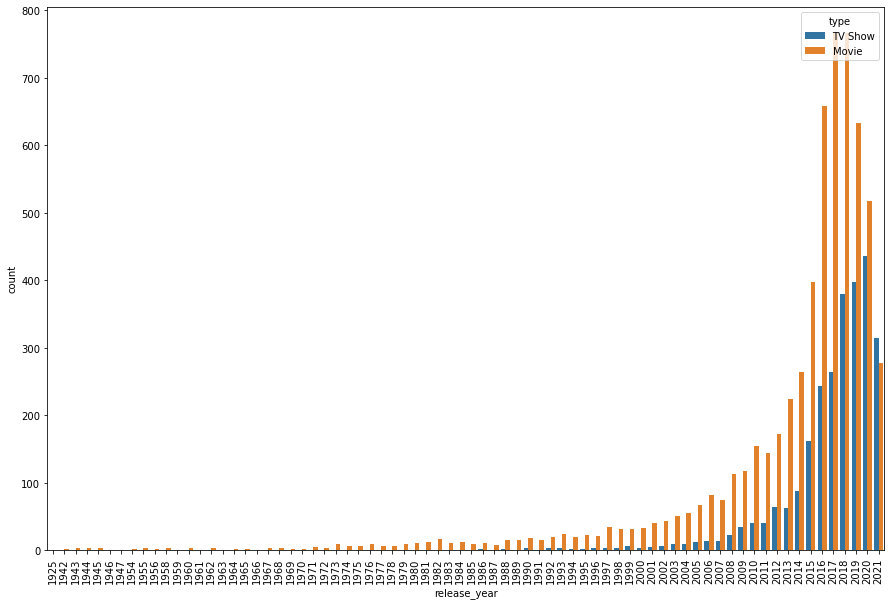

In [73]:
df = data.groupby(['release_year','type']).count()['show_id'].reset_index()
df.columns=['release_year','type','count']
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x='release_year',y='count',hue='type',data=df)

Ans: No of movies are always more than no of tv shows in a year but no of movies released got decreased 2019,20and 21. No of Tv show decreased only in 2021.

# 14. What are the top 5 most common words in the "description" column?

In [133]:
import re
data['description_words']=data['description'].apply(lambda x: re.split(' |\,|\.|\:|\!|\?',x))
words_list = data['description_words'].to_list()
words_dict = {}
words_set = set()
for words in words_list:
    for word in words:
        if(word in words_set):
            words_dict[word]+=1
        else:
            words_dict[word]=1
            words_set.add(word)
sorted(((v,k) for k,v in words_dict.items()), reverse=True)[:6]

[(18910, ''),
 (10108, 'a'),
 (7714, 'the'),
 (6345, 'to'),
 (6319, 'and'),
 (5279, 'of')]

Ans: Top 5 most common words of the description are a, the, to, and, of

# 15. Is there any correlation between the release year and the rating of content?

<AxesSubplot:xlabel='release_year', ylabel='count'>

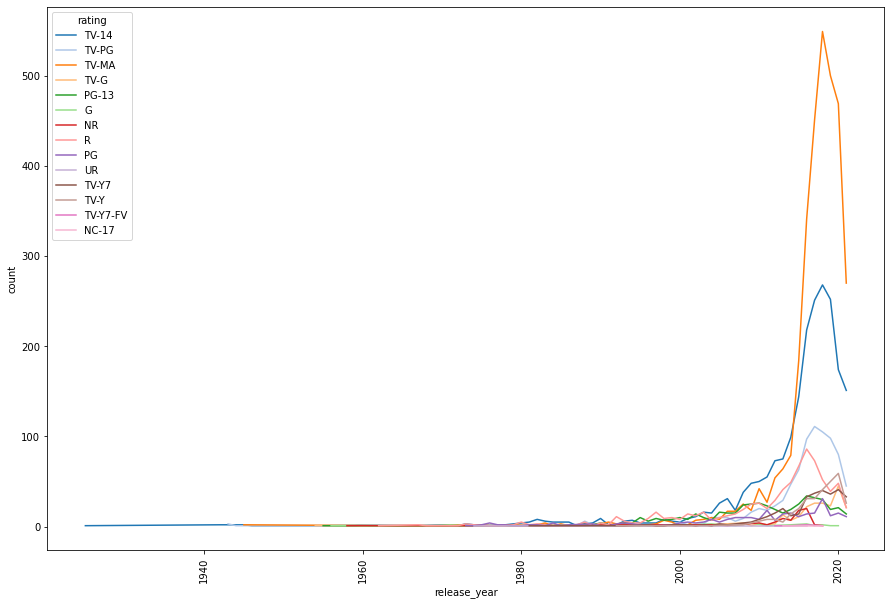

In [92]:
df = data.groupby(['release_year','rating']).count()['show_id'].reset_index()
df.columns=['release_year','rating','count']
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
palette = sns.color_palette("tab20", 14)
sns.lineplot(x='release_year',y='count',hue='rating',palette=palette,data=df)

Inference: TV-14 ratings increase after year 2000 but after year 2015 sudden increase can be seen in TV-MA releases.